In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import os
# import seaborn as sns
# import scipy.stats as stats
import unittest

In [6]:
#Make sure you ran "Battry_Dataset" Notebook first
pd.set_option("display.max_rows", None, "display.max_columns", None)

%store -r df_battery
#df_battery

In [7]:
import csv
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import scipy.stats as stats


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [8]:
#One hot encoding (alphebetical order)
ohe = OneHotEncoder()
ACE = df_battery.loc[:,['anode','cathode','electrolyte']]
ACE = ohe.fit_transform(ACE)
ACE = pd.DataFrame(ACE.toarray())

ACE_col_name = ['A1','C1','C2','C3','E1','E2','E3']
for i in range(len(ACE.columns)):
    ACE = ACE.rename({ACE.columns[i]: ACE_col_name[i]}, axis=1) 
    
df_battery = pd.concat([ACE, df_battery],axis=1)

In [9]:
data = df_battery

np.random.seed(66)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]

    test_row = round(total_row * test_ratio)

    train_row = total_row - test_row
    
    indices = np.random.permutation(total_row)
    train_indx, test_idx = indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_test = test[['Charge_Capacity (Ah)']]
    y_test = test[['Discharge_Capacity (Ah)']]
#    y_test = test[['Charge_Energy (Wh)']]
#    y_test = test[['Discharge_Energy (Wh)']]
#    y_test = test[['Coulombic_Efficiency (%)']]
#    y_test = test[['Energy_Efficiency (%)']]
    X_train = train[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_train = train[['Charge_Capacity (Ah)']]
    y_train = train[['Discharge_Capacity (Ah)']]
#    y_train = train[['Charge_Energy (Wh)']]
#    y_train = train[['Discharge_Energy (Wh)']]
#    y_train = train[['Coulombic_Efficiency (%)']]
#    y_train = train[['Energy_Efficiency (%)']]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)
#print(X_train)

In [10]:
kf = KFold(n_splits=10,random_state =66,shuffle= True)

In [11]:
#Tuning hyperparameters
rand_para = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

svm_model =DecisionTreeRegressor()
n_iteration = 200
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(svm_model,
                                   param_distributions=rand_para,
                                   cv =5,
                                   scoring=Scoring,
                                   error_score=0,
                                   random_state=66,
                                   return_train_score=True,
                                   n_jobs=-1,
                                   n_iter=n_iteration,
                                   verbose=10,
                                   refit=False)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 3/5; 1/200] START max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best
[CV 3/5; 1/200] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best; explained_variance: (train=0.567, test=0.505) neg_mean_squared_error: (train=-0.330, test=-0.423) r2: (train=0.567, test=0.489) total time=   0.0s
[CV 5/5; 2/200] START max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random
[CV 5/5; 2/200] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random; explained_variance: (train=0.577, test=0.537) neg_mean_squared_error: (train=-0.324, test=-0.370) r2: (train=0.577, test=0.536) total time=   0.0s
[CV 2/5; 4/200] START max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9,

[CV 1/5; 1/200] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best; explained_variance: (train=0.008, test=-0.016) neg_mean_squared_error: (train=-0.802, test=-0.650) r2: (train=0.008, test=-0.017) total time=   0.0s
[CV 1/5; 3/200] START max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random
[CV 1/5; 3/200] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random; explained_variance: (train=0.000, test=0.000) neg_mean_squared_error: (train=0.000, test=0.000) r2: (train=0.000, test=0.000) total time=   0.0s
[CV 3/5; 3/200] START max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random
[CV 3/5; 3/200] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random; explained_varian

[CV 4/5; 53/200] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random; explained_variance: (train=0.529, test=0.704) neg_mean_squared_error: (train=-0.352, test=-0.258) r2: (train=0.529, test=0.703) total time=   0.0s
[CV 5/5; 77/200] START max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best
[CV 5/5; 77/200] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best; explained_variance: (train=0.561, test=0.508) neg_mean_squared_error: (train=-0.337, test=-0.392) r2: (train=0.561, test=0.508) total time=   0.0s
[CV 1/5; 78/200] START max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best
[CV 1/5; 78/200] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best; explained_vari

[CV 2/5; 73/200] START max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random
[CV 2/5; 73/200] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random; explained_variance: (train=0.580, test=0.426) neg_mean_squared_error: (train=-0.331, test=-0.418) r2: (train=0.580, test=0.422) total time=   0.0s
[CV 3/5; 73/200] START max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random
[CV 3/5; 73/200] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random; explained_variance: (train=0.567, test=0.505) neg_mean_squared_error: (train=-0.330, test=-0.423) r2: (train=0.567, test=0.489) total time=   0.0s
[CV 4/5; 73/200] START max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random
[CV 4/5;

[CV 3/5; 110/200] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random; explained_variance: (train=0.593, test=0.513) neg_mean_squared_error: (train=-0.310, test=-0.411) r2: (train=0.593, test=0.504) total time=   0.0s
[CV 4/5; 110/200] START max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random
[CV 4/5; 110/200] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random; explained_variance: (train=0.589, test=0.727) neg_mean_squared_error: (train=-0.308, test=-0.238) r2: (train=0.589, test=0.727) total time=   0.0s
[CV 5/5; 110/200] START max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random
[CV 5/5; 110/200] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
415 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
415 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0

RandomizedSearchCV(cv=5, error_score=0, estimator=DecisionTreeRegressor(),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                             

In [12]:
np.random.seed(66)
DT_model_train =DecisionTreeRegressor(random_state = 66)

for train_index, test_index in kf.split(X_train):
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    
    np.random.seed(66)
    DT_model_train.fit(X_training,y_training)
    y_train_predicted = DT_model_train.predict(X_validate)

MSE_train = mean_squared_error(y_train_predicted, y_validate)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

0.7895471676853765


In [14]:
DecisionTree_model =DecisionTreeRegressor(random_state = 66)
np.random.seed(66)
DecisionTree_model.fit(X_train,y_train)
y_predict=DecisionTree_model.predict(X_test)

In [15]:
MSE_test = mean_squared_error(y_predict, y_test)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

0.7433258717161


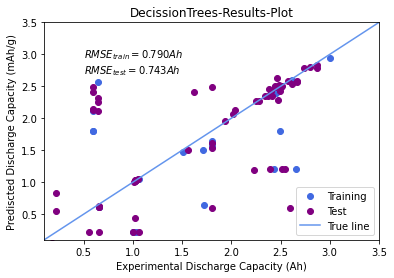

[CV 1/5; 103/200] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random; explained_variance: (train=0.579, test=0.525) neg_mean_squared_error: (train=-0.340, test=-0.321) r2: (train=0.579, test=0.498) total time=   0.0s
[CV 2/5; 103/200] START max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random
[CV 2/5; 103/200] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random; explained_variance: (train=0.588, test=0.479) neg_mean_squared_error: (train=-0.324, test=-0.379) r2: (train=0.588, test=0.477) total time=   0.0s
[CV 4/5; 138/200] START max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best
[CV 4/5; 138/200] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best; explaine

[CV 1/5; 131/200] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random; explained_variance: (train=0.000, test=0.000) neg_mean_squared_error: (train=-0.808, test=-0.641) r2: (train=0.000, test=-0.002) total time=   0.0s
[CV 2/5; 131/200] START max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random
[CV 2/5; 131/200] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random; explained_variance: (train=0.000, test=-0.000) neg_mean_squared_error: (train=-0.787, test=-0.724) r2: (train=0.000, test=-0.000) total time=   0.0s
[CV 3/5; 131/200] START max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random
[CV 3/5; 131/200] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random; e

[CV 4/5; 120/200] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random; explained_variance: (train=0.529, test=0.703) neg_mean_squared_error: (train=-0.353, test=-0.259) r2: (train=0.529, test=0.703) total time=   0.0s
[CV 5/5; 120/200] START max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random
[CV 5/5; 120/200] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random; explained_variance: (train=0.577, test=0.537) neg_mean_squared_error: (train=-0.324, test=-0.370) r2: (train=0.577, test=0.536) total time=   0.0s
[CV 1/5; 121/200] START max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random
[CV 1/5; 121/200] END max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random; ex

[CV 4/5; 158/200] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best; explained_variance: (train=0.000, test=0.000) neg_mean_squared_error: (train=0.000, test=0.000) r2: (train=0.000, test=0.000) total time=   0.0s
[CV 5/5; 158/200] START max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best
[CV 5/5; 158/200] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best; explained_variance: (train=0.000, test=0.000) neg_mean_squared_error: (train=0.000, test=0.000) r2: (train=0.000, test=0.000) total time=   0.0s
[CV 1/5; 159/200] START max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random
[CV 1/5; 159/200] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random; explained

In [16]:
import numpy
import matplotlib.pyplot as plt

plt.axis([0.1,3.5,0.1,3.5])
plt.scatter(x = y_validate, y = y_train_predicted, c='royalblue',label='Training')
plt.scatter(x = y_test, y = y_predict, c='purple',label='Test')
plt.plot([0,5],[0,5],label ='True line',c='cornflowerblue')
plt.legend(loc='lower right')
plt.title(label='DecissionTrees-Results-Plot')

plt.xlabel(r'Experimental Discharge Capacity (Ah)')
plt.ylabel(r'Prediscted Discharge Capacity (mAh/g)')
plt.text(0.5, 2.5, r'$RMSE_{train}=0.790Ah$'+'\n'+r'$RMSE_{test}=0.743Ah$' +"\n")
plt.savefig('DecissionTrees-Predicted-vs-test.png',dpi=600)
plt.show()